In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import os

In [13]:
data_exmpl = pd.read_csv('../data/uber-raw-data-sep14.csv')


In [14]:
data_exmpl

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


Data from april to september of 2014 have all the same fields in csv, so we can merge them and analyse them together

In [4]:
df_apr_2014 = pd.read_csv('../data/uber-raw-data-apr14.csv')
df_may_2014 = pd.read_csv('../data/uber-raw-data-may14.csv')
df_jun_2014 = pd.read_csv('../data/uber-raw-data-jun14.csv')
df_jul_2014 = pd.read_csv('../data/uber-raw-data-jul14.csv')
df_aug_2014 = pd.read_csv('../data/uber-raw-data-aug14.csv')
df_sep_2014 = pd.read_csv('../data/uber-raw-data-sep14.csv')

In [5]:
data_list = [df_apr_2014,df_may_2014,df_jun_2014,df_jul_2014,df_aug_2014,df_sep_2014]

In [17]:
data_list

[                 Date/Time      Lat      Lon    Base
 0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
 1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
 2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
 3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
 4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
 ...                    ...      ...      ...     ...
 564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
 564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
 564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
 564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
 564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764
 
 [564516 rows x 4 columns],
                  Date/Time      Lat      Lon    Base
 0         5/1/2014 0:02:00  40.7521 -73.9914  B02512
 1         5/1/2014 0:06:00  40.6965 -73.9715  B02512
 2         5/1/2014 0:15:00  40.7464 -73.9838  B02512
 3         5/1/2014 0:17:00  40.7463 -74.0011  B02512
 4         5/1/2014 0:17:00  40.7594 -73.9734  B0251

We can take a look into number of pickups for each month

In [6]:
for month_data in data_list:
    month_data['Date/ Time'] = pd.to_datetime(month_data['Date/Time'], format='%m/%d/%Y %H:%M:%S')
    month_data['Hour'] = month_data['Date/ Time'].dt.hour
    month_data['Month'] = month_data['Date/ Time'].dt.month
    month_data['Day'] = month_data['Date/ Time'].dt.day

In [6]:
#df_apr_2014['Date/ Time'] = pd.to_datetime(df_apr_2014['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [7]:
df_apr_sep_2014 = pd.concat(data_list,ignore_index=True)

In [11]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base,Date/ Time,Hour,Month,Day
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,0,4,1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,0,4,1
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,0,4,1
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,0,4,1
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,0,4,1
...,...,...,...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30 22:57:00,22,9,30
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30 22:57:00,22,9,30
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30 22:58:00,22,9,30
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30 22:58:00,22,9,30


In [23]:
pd.value_counts(df_apr_sep_2014['Month'])

C:\Users\MARKO\AppData\Local\Temp\ipykernel_27716\3820970743.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_apr_sep_2014['Month'])


Month
9    1028136
8     829275
7     796121
6     663844
5     652435
4     564516
Name: count, dtype: int64

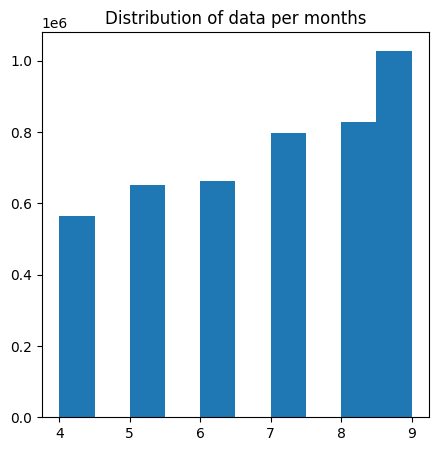

In [24]:
plt.figure(figsize=(5,5))
# sns.histplot(df_aug_sep_2014['Month'])
plt.hist(df_apr_sep_2014['Month'])
plt.title('Distribution of data per months')
plt.show()

We can notice that we have most data for September pickups, and least for April

### Distribution of pickups between different hours in a day 

In [28]:
type(df_apr_sep_2014['Date/ Time'].dtype)

numpy.dtypes.DateTime64DType

In [29]:
df_apr_sep_2014['Date/ Time'].dt.hour

0           0
1           0
2           0
3           0
4           0
           ..
4534322    22
4534323    22
4534324    22
4534325    22
4534326    22
Name: Date/ Time, Length: 4534327, dtype: int32

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


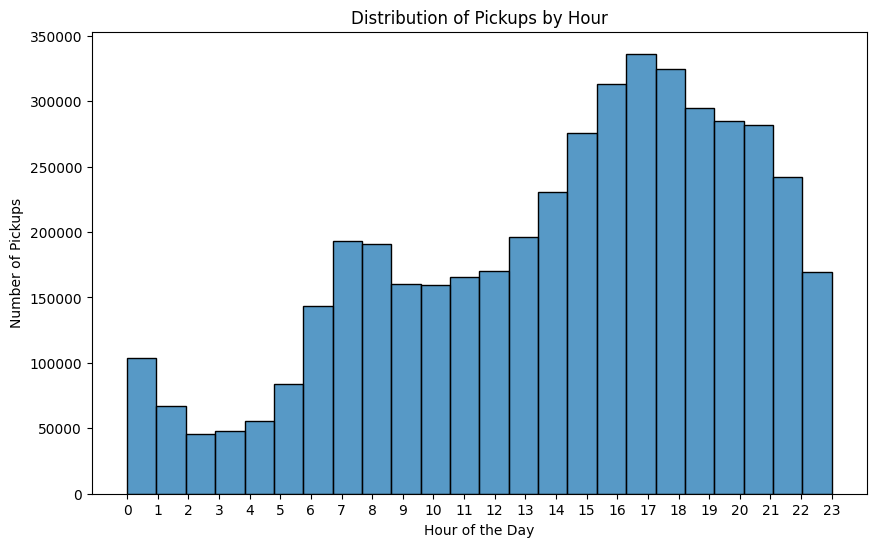

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df_apr_sep_2014['Hour'], bins=24, kde=False)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

We can notice that the most amount of pickups are in the afternoon, and that biggest part of that are between 16 and 19 hours. The least amount of pickups are in the early morning from 0 till 6 o'clock.

We can also see the distribution of pickups between hours considering belonging months 

In [8]:
from matplotlib.lines import Line2D

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

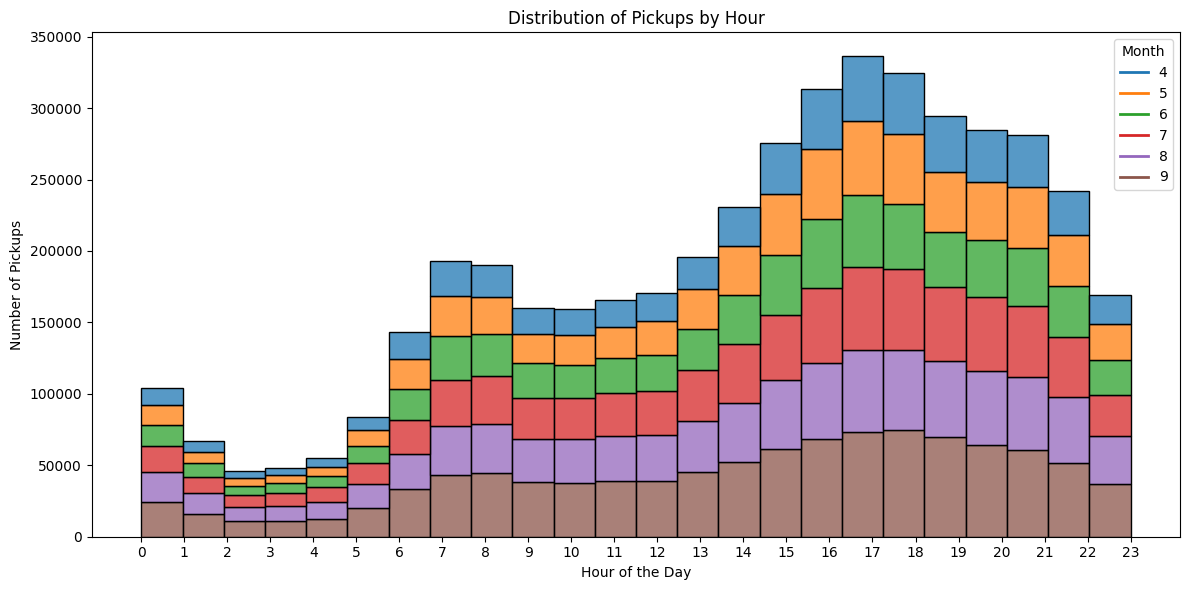

In [32]:
unique_months = df_apr_sep_2014['Month'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_months))

month_palette = dict(zip(unique_months, palette))

handles = [Line2D([0], [0], color=color, lw=2) for color in palette]
labels = [month for month in unique_months]

plt.figure(figsize=(12,6))
sns.histplot(data=df_apr_sep_2014,x='Hour',hue='Month',multiple='stack', bins=24, kde=False,palette=month_palette)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.legend(handles=handles,labels=labels,title='Month')
plt.tight_layout()
plt.show()

As we already noticed that for September we have largest amount of data same we can see in this plot representing distribution of pickups by daily hours, with colors representing to which month pickups belong to

We can take a look into distribution of data per hours for months separately

In [35]:
df_jul_2014['Hour']

0          0
1          0
2          0
3          0
4          0
          ..
796116    23
796117    23
796118    23
796119    23
796120    23
Name: Hour, Length: 796121, dtype: int32

In [36]:
df_apr_2014['Hour']

0          0
1          0
2          0
3          0
4          0
          ..
564511    23
564512    23
564513    23
564514    23
564515    23
Name: Hour, Length: 564516, dtype: int32

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

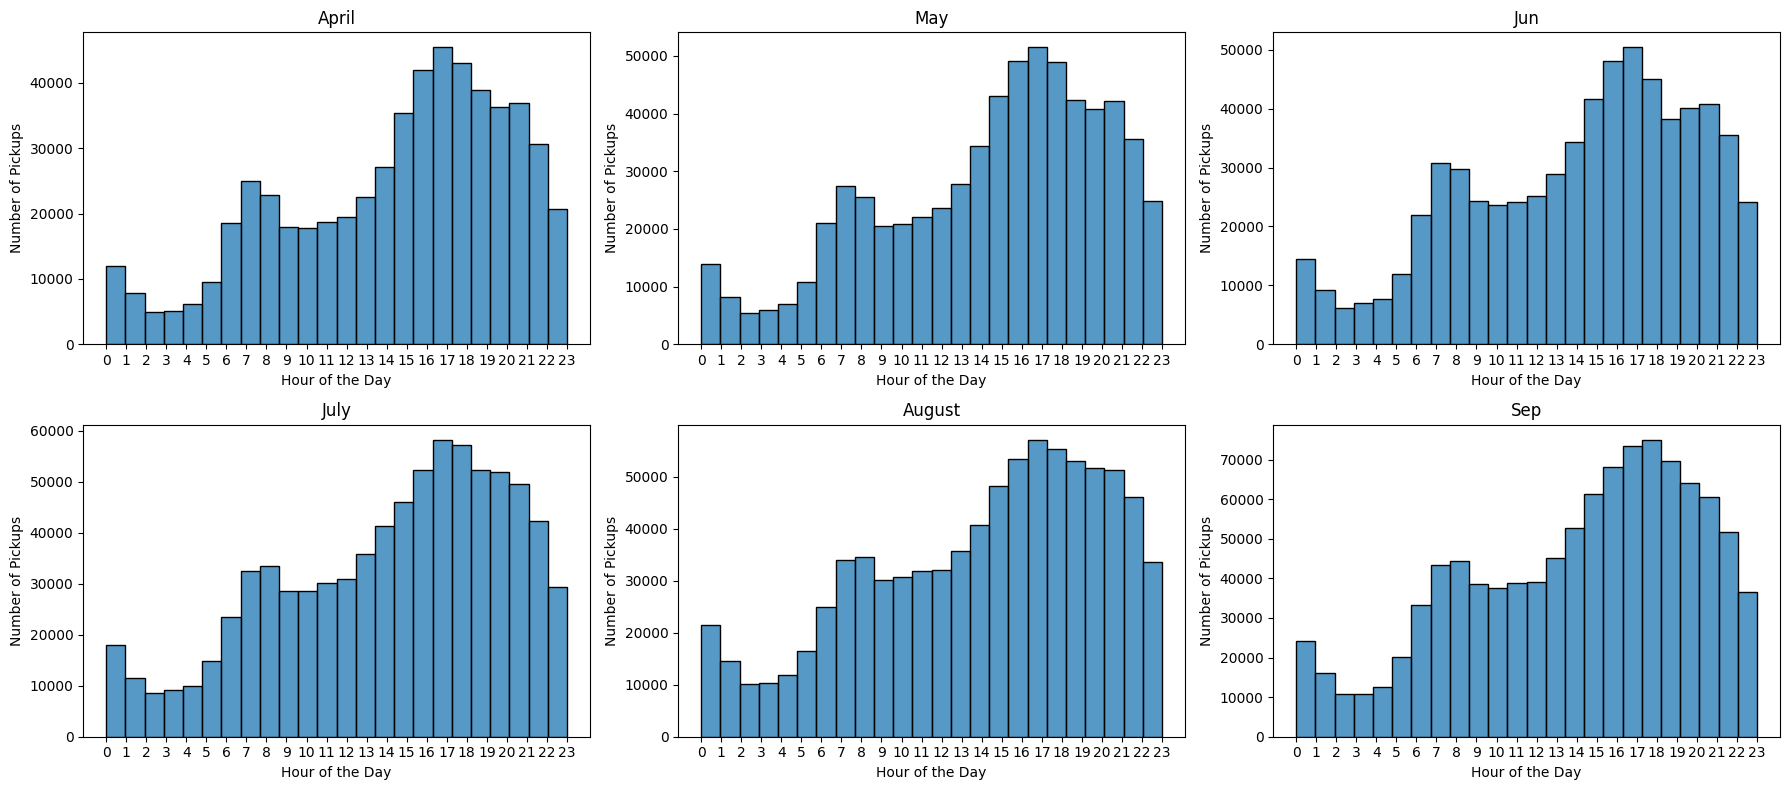

In [37]:
map = {
    1: "April",
    2: "May",
    3: "Jun",
    4: "July",
    5: "August",
    6: "Sep",
}

plt.figure(figsize=(18,8))

for i,month_data in enumerate(data_list):
    plt.subplot(2,3,i+1)
    sns.histplot(month_data['Hour'], bins=24, kde=False)
    plt.title(f'{map[i+1]}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Pickups')
    plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

We can see that distribution of pickups per hours is simmilar for all representing months. But we can also notice that in July, August and September there is a lot more rides in the evening than in previous months.

### Distribution of data per days of a month

As we already saw how pickups are distributed for different within hours of a day, it would also be interesting to see distribution within days in one month. 

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


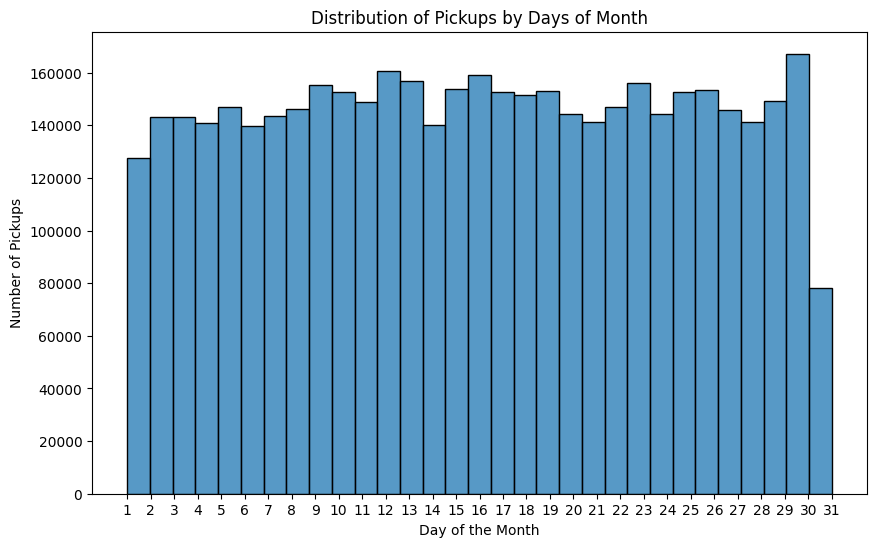

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df_apr_sep_2014['Day'], bins=31, kde=False)
plt.title('Distribution of Pickups by Days of Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 32))
plt.show()

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

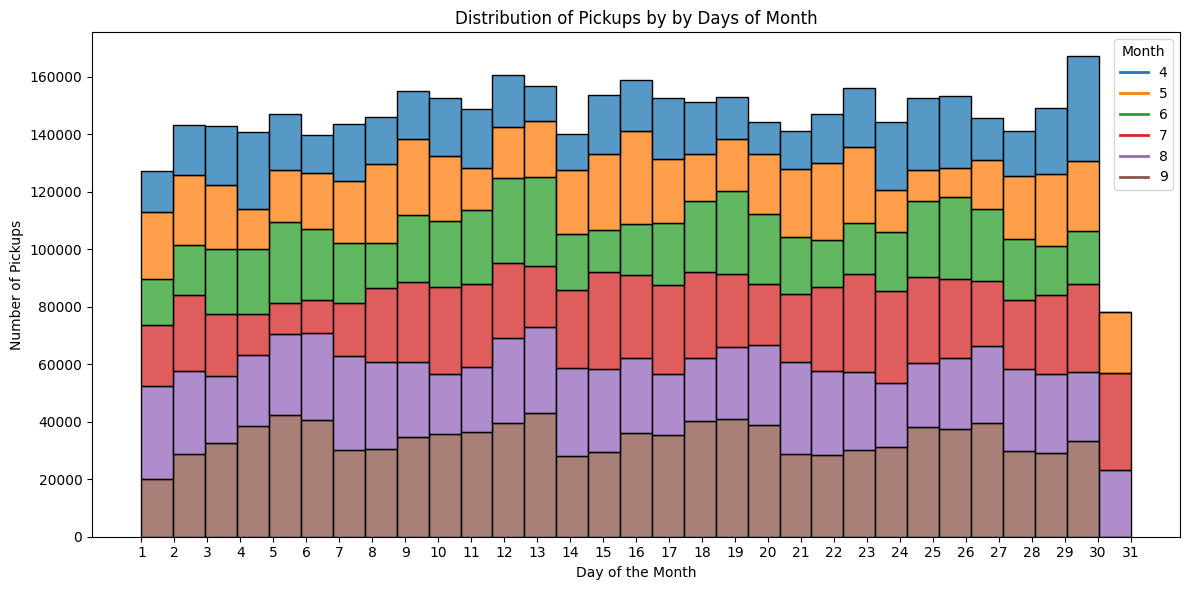

In [17]:
unique_months = df_apr_sep_2014['Month'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_months))

month_palette = dict(zip(unique_months, palette))

handles = [Line2D([0], [0], color=color, lw=2) for color in palette]
labels = [month for month in unique_months]

plt.figure(figsize=(12,6))
sns.histplot(data=df_apr_sep_2014,x='Day',hue='Month',multiple='stack', bins=31, kde=False,palette=month_palette)
plt.title('Distribution of Pickups by by Days of Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 32))
plt.legend(handles=handles,labels=labels,title='Month')
plt.tight_layout()
plt.show()

We can notice that 30th of the month has the most pickups, and also we can see based on the colorings of months that the april is most contributing month for that day. When we look into distribution of pickups per days of month for april we can see that we have significantly more data than for other days. (Probably it was some holiday)

Also we can see that for 31th we have least data, that is expected because we know that only half of months have that day.

In [23]:
pd.value_counts(df_apr_2014['Day']).sort_values

C:\Users\MARKO\AppData\Local\Temp\ipykernel_12492\134746291.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_apr_2014['Day']).sort_values


<bound method Series.sort_values of Day
30    36251
4     26714
25    25095
26    24925
24    23352
29    22835
17    20973
3     20701
15    20641
11    20420
23    20346
10    20041
7     19550
5     19521
12    18170
18    18074
16    17717
2     17474
22    16975
9     16843
8     16188
28    15475
27    14677
19    14602
1     14546
6     13445
21    13162
14    12674
13    12112
20    11017
Name: count, dtype: int64>

In [25]:
np.unique(df_apr_2014['Date/ Time'].dt.day_of_week)

array([0, 1, 2, 3, 4, 5, 6])

### Distribution of pickups within days of week

In [9]:
df_apr_sep_2014['DayOfWeek'] = df_apr_sep_2014['Date/ Time'].dt.day_of_week

In [28]:
np.unique(df_apr_sep_2014['DayOfWeek'])

array([0, 1, 2, 3, 4, 5, 6])

In [19]:
np.unique(df_apr_sep_2014['Month'])

array([4, 5, 6, 7, 8, 9])

In [20]:
months_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
days_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df_apr_sep_2014['Month'] = df_apr_sep_2014['Month'].map(months_map)
df_apr_sep_2014['DayOfWeek'] = df_apr_sep_2014['DayOfWeek'].map(days_map)

In [21]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base,Date/ Time,Hour,Month,Day,DayOfWeek
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,0,April,1,Tuesday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,0,April,1,Tuesday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,0,April,1,Tuesday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,0,April,1,Tuesday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,0,April,1,Tuesday
...,...,...,...,...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30 22:58:00,22,September,30,Tuesday
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30 22:58:00,22,September,30,Tuesday


In [22]:
data_agg = df_apr_sep_2014.groupby(['Month', 'DayOfWeek']).size().reset_index(name='count')


In [23]:
months_order = [ 'April', 'May', 'June','July','August','September']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the categories for ordered plotting
data_agg['Month'] = pd.Categorical(data_agg['Month'], categories=months_order, ordered=True)
data_agg['DayOfWeek'] = pd.Categorical(data_agg['DayOfWeek'], categories=days_order, ordered=True)


In [24]:
data_agg

,Month,DayOfWeek,count
0,April,Friday,90303
1,April,Monday,60861
2,April,Saturday,77218
3,April,Sunday,51251
4,April,Thursday,85067
5,April,Tuesday,91185
6,April,Wednesday,108631
7,August,Friday,148674
8,August,Monday,91633
9,August,Saturday,132225


C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


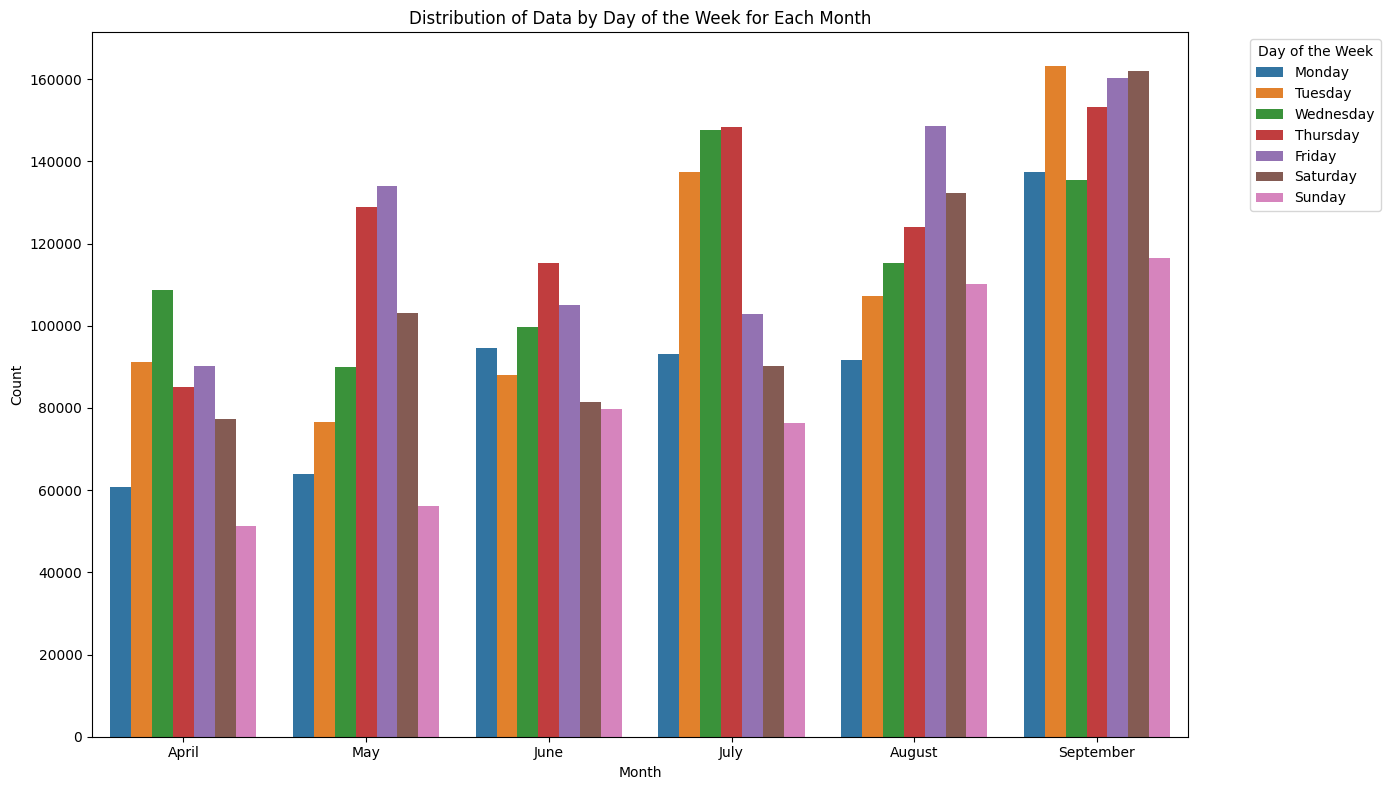

In [25]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg, x='Month', y='count', hue='DayOfWeek', hue_order=days_order, palette='tab10')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Data by Day of the Week for Each Month')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

Looking at this plot we can notice that Sunday is generaly day when people use uber least, next to Sunday is Monday being second from the end in most of the months. 
As of the day with largest consumption of uber, it defers within different months, so we cannot give a general conclusion.

We took a look into dependencies between hour/day/month and number of pickups

In [10]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base,Date/ Time,Hour,Month,Day,DayOfWeek
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,0,4,1,1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,0,4,1,1
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,0,4,1,1
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,0,4,1,1
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,0,4,1,1
...,...,...,...,...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30 22:57:00,22,9,30,1
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30 22:57:00,22,9,30,1
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30 22:58:00,22,9,30,1
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30 22:58:00,22,9,30,1


We can see that we also have an information about Location of pickup and Base, lets see number of trips by bases

In [11]:
np.unique(df_apr_sep_2014['Base'])

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [12]:
pd.value_counts(df_apr_sep_2014['Base'])

C:\Users\MARKO\AppData\Local\Temp\ipykernel_12120\1935491250.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_apr_sep_2014['Base'])


Base
B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: count, dtype: int64

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

<Axes: xlabel='Base', ylabel='Count'>

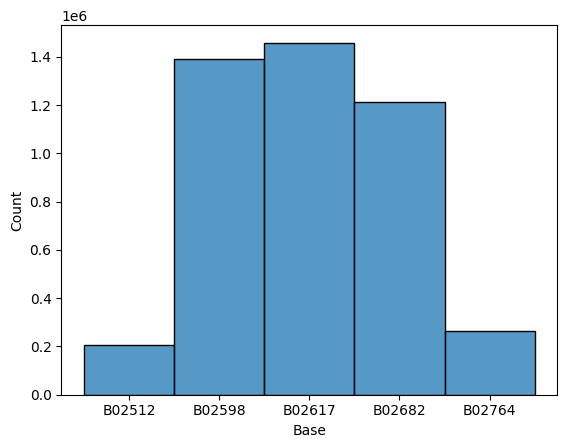

In [15]:
sns.histplot(df_apr_sep_2014['Base'])

So we can see that we have 5 different bases, and that base B02617 has the most trips overall through all 6 months.

Let's see distribution of trips per bases within different months

In [20]:
data_agg_bases_months = df_apr_sep_2014.groupby(['Base', 'Month']).size().reset_index(name='count')

In [17]:
data_agg_bases_months

,Base,Month,count
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


In [23]:
months_order = [ 'April', 'May', 'June','July','August','September']
#days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

months_map = {4:'April',5: 'May',6: 'June',7:'July',8:'August',9:'September'}

# Set the categories for ordered plotting
data_agg_bases_months['Month'] = data_agg_bases_months['Month'].map(months_map)

In [24]:
data_agg_bases_months

,Base,Month,count
0,B02512,April,35536
1,B02512,May,36765
2,B02512,June,32509
3,B02512,July,35021
4,B02512,August,31472
5,B02512,September,34370
6,B02598,April,183263
7,B02598,May,260549
8,B02598,June,242975
9,B02598,July,245597


C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

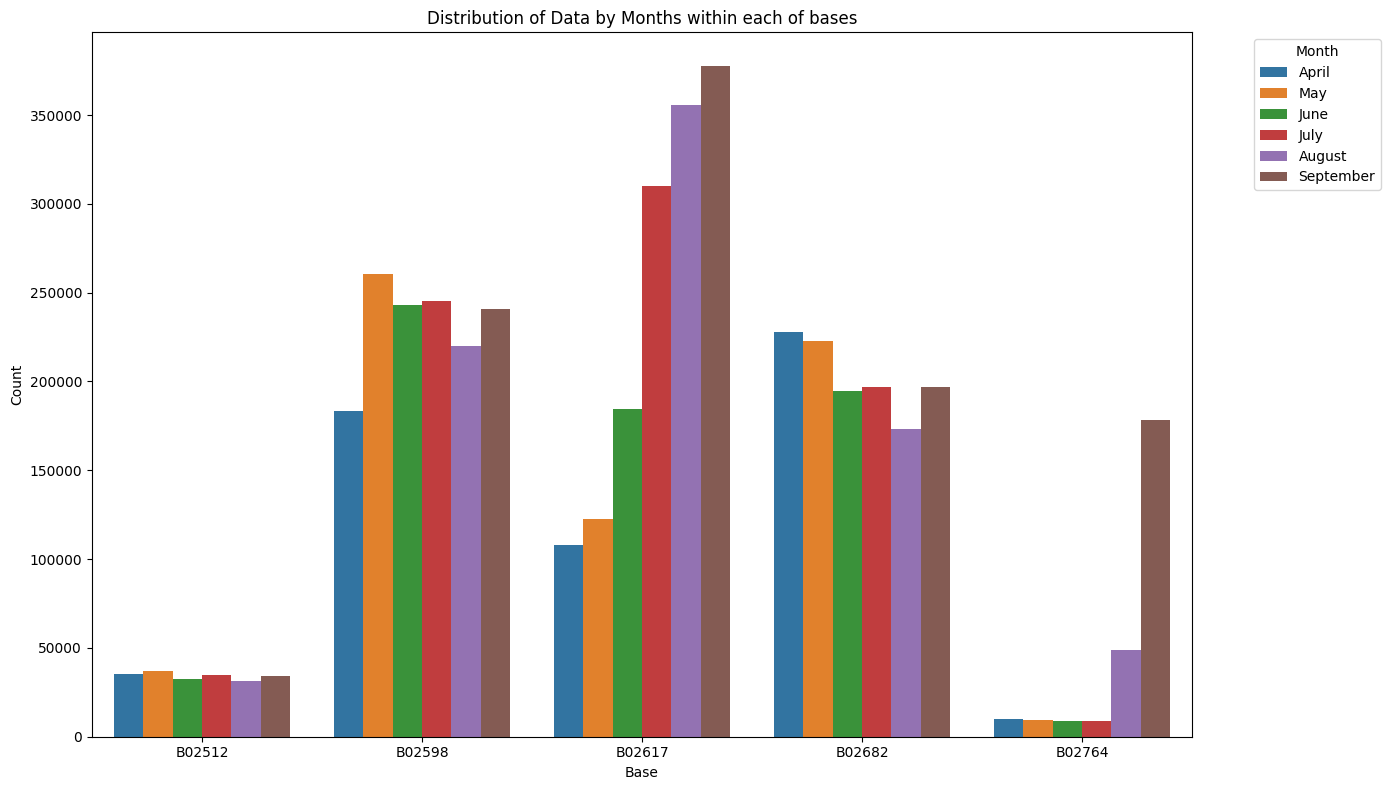

In [25]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg_bases_months, x='Base', y='count', hue='Month', hue_order=months_order, palette='tab10')

plt.xlabel('Base')
plt.ylabel('Count')
plt.title('Distribution of Data by Months within each of bases')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

Based on this plot we can see how active is what base on what month, as we previously stated that the most used base is B02617 it looks like it is mostly used during summer months July, August and September, when for other three months bases B02598 and B02682 have more piskups.

### It is also interesting to see dependency of trips base out of day of the week

In [30]:
data_agg_bases_days = df_apr_sep_2014.groupby(['Base','DayOfWeek']).size().reset_index(name='count')

In [31]:
data_agg_bases_days

,Base,DayOfWeek,count
0,B02512,0,25460
1,B02512,1,31670
2,B02512,2,32929
3,B02512,3,35032
4,B02512,4,33319
5,B02512,5,26773
6,B02512,6,20490
7,B02598,0,163542
8,B02598,1,202378
9,B02598,2,216644


In [32]:
days_map = {0:'Sunday',1:'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}

data_agg_bases_days['DayOfWeek'] = data_agg_bases_days['DayOfWeek'].map(days_map)

In [33]:
data_agg_bases_days

,Base,DayOfWeek,count
0,B02512,Sunday,25460
1,B02512,Monday,31670
2,B02512,Tuesday,32929
3,B02512,Wednesday,35032
4,B02512,Thursday,33319
5,B02512,Friday,26773
6,B02512,Saturday,20490
7,B02598,Sunday,163542
8,B02598,Monday,202378
9,B02598,Tuesday,216644


In [ ]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg_bases_months, x='Base', y='count', hue='Month', hue_order=months_order, palette='tab10')

plt.xlabel('Base')
plt.ylabel('Count')
plt.title('Distribution of Data by Months within each of bases')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

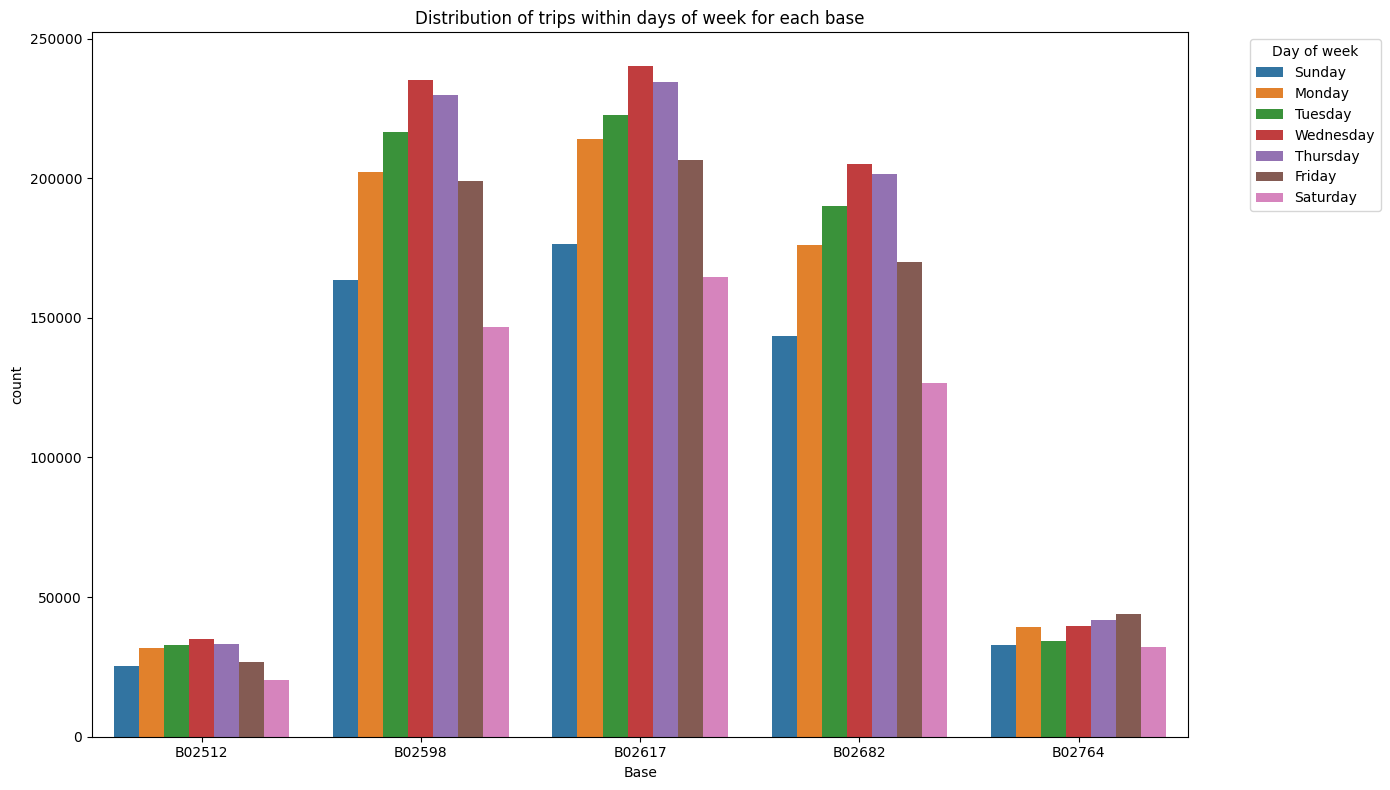

In [35]:
plt.figure(figsize=(14,8))

sns.barplot(data=data_agg_bases_days,x='Base',y='count',hue='DayOfWeek',hue_order=days_order,palette='tab10')

plt.xlabel('Base')
plt.ylabel('count')
plt.legend(title='Day of week',bbox_to_anchor=(1.05,1),loc='upper left')
plt.title('Distribution of trips within days of week for each base')
plt.tight_layout()
plt.show()

Firstly we can notice that base B02512 is low used trip base, but based on this and previous plot we can see that it has consistent number of trips for each month and for each day of week. (Looks like some kid of base that represents probably not that popular part of city (without some tourist attractions )) 

Next we can notice that for all three bases B02598, B02617 and B02682 we have simmilar distribution of trips within days of week, with wednesday being day of most trips

### Heatmap of day, hour and month

Let's take a look into mutual dependencies of these three atributes of trips 

####  Heatmap by Hour and Day

In [58]:
data_agg_day_hour = df_apr_sep_2014.groupby(['Day','Hour']).size().unstack(level=0)

In [59]:
data_agg_day_hour

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,3247,2480,3415,2944,2786,4623,3715,2882,2708,3351,...,2852,2605,3277,2442,3887,5304,4224,2732,2439,2209
1,1982,1600,2176,1718,1567,2932,2326,1672,1757,2167,...,1662,1608,2090,1525,3123,3712,2711,1862,1547,1407
2,1284,1109,1434,1217,1047,1902,1533,1147,1246,1495,...,1207,1163,1480,1098,2087,2407,1894,1442,1135,1107
3,1331,1442,1489,1449,1278,1599,1622,1509,1501,1466,...,1503,1465,1520,1472,1840,2098,1846,1717,1436,935
4,1458,1897,1578,1737,1648,1584,1793,1921,1911,1614,...,1984,1994,1825,1972,1770,1759,1916,1990,1864,788
5,2171,2861,2437,2623,2958,2201,2464,3282,3227,2652,...,3222,3182,2802,3029,2389,2380,2846,3127,3264,1012
6,3717,5002,4318,4687,4919,3705,4172,5528,5910,4757,...,5315,5315,4565,5465,3838,3609,4368,5329,5850,1590
7,5470,6646,5775,6146,6379,4846,5649,7474,7720,6168,...,6981,7027,6111,7775,5282,5023,5828,6992,7735,2201
8,5376,6420,5482,5799,6580,5009,5459,7472,7641,6271,...,6995,6564,6024,7214,5169,5142,5759,6825,7760,2442


In [60]:
data_agg_day_hour = data_agg_day_hour.reindex(index=sorted(data_agg_day_hour.index, reverse=True))


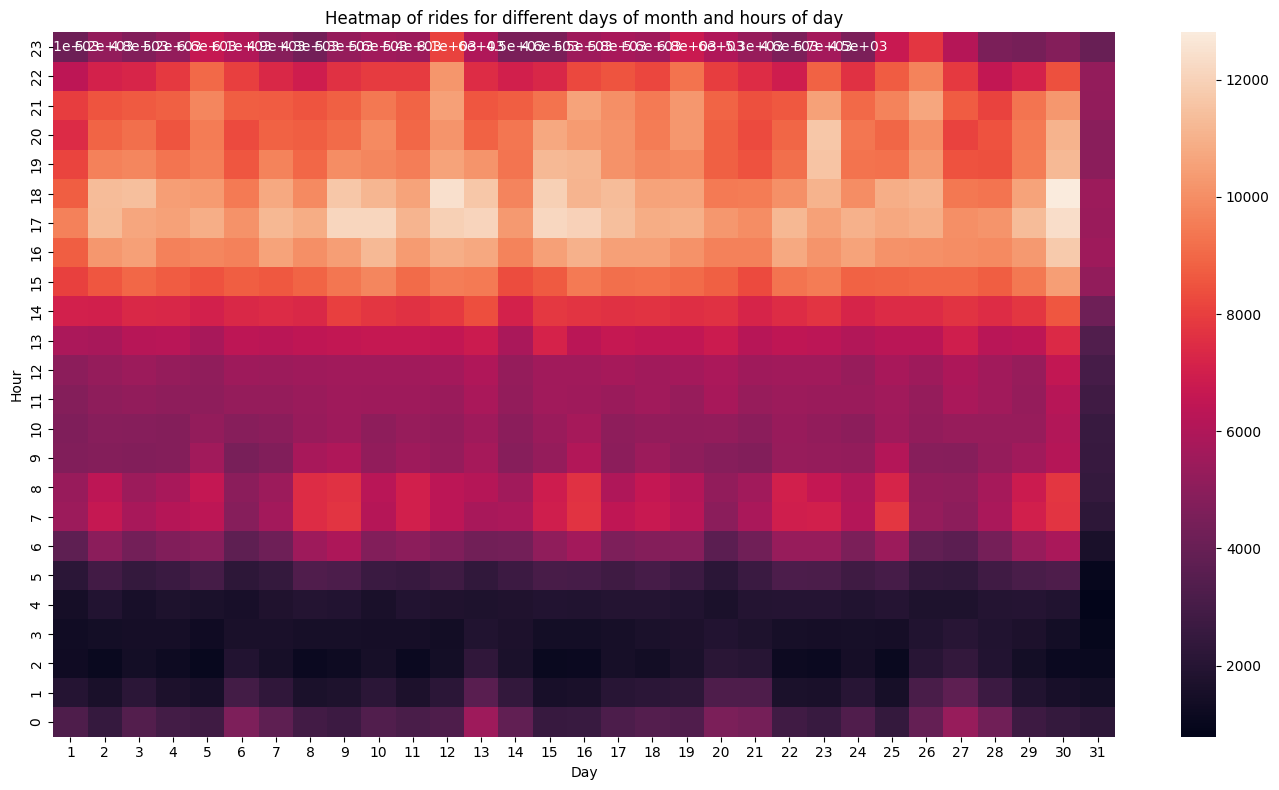

In [61]:
plt.figure(figsize=(14,8))

sns.heatmap(data=data_agg_day_hour,annot=True)

plt.title('Heatmap of rides for different days of month and hours of day')

plt.tight_layout()

plt.show()

Since the lighter colors represent more trips, we can notice that trips are simmilarly distributed within hours for all days of month, with most trips between 17-19h. And least trips between 1-5h.